In [2]:
from pathlib import Path
import seaborn as sns
import scipy as sp
import pandas as pd
import matplotlib.pyplot as plt

from ff_energy.latex_writer.report import Report
from ff_energy.latex_writer.energydata.energy_data_report import EnergyReport
from ff_energy.latex_writer.figure import Figure
from ff_energy.latex_writer.format import safe_latex_string
from ff_energy.utils.ffe_utils import read_from_pickle, pickle_output

from ff_energy.ffe.ff import FF
from ff_energy.ffe.constants import PKL_PATH, PDB_PATH
from ff_energy.ffe.potential import LJ, LJ_bound, DE #, DE_bounds

from ff_energy.ffe.data import pairs_data
from ff_energy.plotting.data_plots import DataPlots


2023-09-14 12:03:42 | DEBUG | __init__:process_initializer_module:72 - Initializing MLIR with module: _site_initialize_0
2023-09-14 12:03:42 | DEBUG | __init__:process_initializer_module:74 - Registering dialects from initializer <module 'jaxlib.mlir._mlir_libs._site_initialize_0' from '/home/boittier/miniconda3/envs/pycharmm/lib/python3.8/site-packages/jaxlib/mlir/_mlir_libs/_site_initialize_0.so'>


0 ('C', 'C')
1 ('C', 'CG331')
2 ('C', 'CL')
3 ('C', 'H')
4 ('C', 'HGA3')
5 ('C', 'HGP1')
6 ('C', 'HT')
7 ('C', 'OG311')
8 ('C', 'OT')
9 ('CG331', 'CG331')
10 ('CG331', 'CL')
11 ('CG331', 'H')
12 ('CG331', 'HGA3')
13 ('CG331', 'HGP1')
14 ('CG331', 'HT')
15 ('CG331', 'OG311')
16 ('CG331', 'OT')
17 ('CL', 'CL')
18 ('CL', 'H')
19 ('CL', 'HGA3')
20 ('CL', 'HGP1')
21 ('CL', 'HT')
22 ('CL', 'OG311')
23 ('CL', 'OT')
24 ('H', 'H')
25 ('H', 'HGA3')
26 ('H', 'HGP1')
27 ('H', 'HT')
28 ('H', 'OG311')
29 ('H', 'OT')
30 ('HGA3', 'HGA3')
31 ('HGA3', 'HGP1')
32 ('HGA3', 'HT')
33 ('HGA3', 'OG311')
34 ('HGA3', 'OT')
35 ('HGP1', 'HGP1')
36 ('HGP1', 'HT')
37 ('HGP1', 'OG311')
38 ('HGP1', 'OT')
39 ('HT', 'HT')
40 ('HT', 'OG311')
41 ('HT', 'OT')
42 ('OG311', 'OG311')
43 ('OG311', 'OT')
44 ('OT', 'OT')


<Figure size 100x100 with 0 Axes>

In [10]:
test = next(read_from_pickle(PKL_PATH / "ELECp_dcm_lj.pkl"))

In [11]:
test.debug_df["delta_sigma"] =  test.debug_df["sigmas"] - test.debug_df["sigmas2"]  #.describe() #.groupby("gname").sum().describe()

test.debug_df[ test.debug_df["delta_sigma"] > 0.001 ]

,group,es,akp,idx,gname,distances,sigmas,epsilons,sigmas2,epsilons2,jaxflat,delta_sigma
1710,0,-0.019873,3,1710,100_1018_DCM_120_967,7.864031,3.704473,0.914381,2.347669,0.730165,-0.001033,1.356804
1711,0,-0.019873,3,1711,100_1018_DCM_120_967,7.864031,3.704473,0.914381,2.347669,0.730165,-0.001033,1.356804
1712,0,-0.001795,3,1712,100_1018_DCM_120_967,11.750380,3.704473,0.914381,2.347669,0.730165,-0.000093,1.356804
1713,0,-0.001795,3,1713,100_1018_DCM_120_967,11.750380,3.704473,0.914381,2.347669,0.730165,-0.000093,1.356804
1714,0,-0.326269,3,1714,100_1018_DCM_120_967,4.852254,3.704473,0.914381,2.347669,0.730165,-0.018613,1.356804
...,...,...,...,...,...,...,...,...,...,...,...,...
947715,199,-0.003301,3,947715,100_992_DCM_117_761,10.614685,3.704473,0.914381,2.347669,0.730165,-0.000171,1.356804
947716,199,-0.000734,3,947716,100_992_DCM_117_761,13.639188,3.704473,0.914381,2.347669,0.730165,-0.000038,1.356804
947717,199,-0.000734,3,947717,100_992_DCM_117_761,13.639188,3.704473,0.914381,2.347669,0.730165,-0.000038,1.356804
947718,199,-0.001252,3,947718,100_992_DCM_117_761,12.477437,3.704473,0.914381,2.347669,0.730165,-0.000065,1.356804


In [12]:
test.debug_df["sigmas"].unique()

array([0.6655605 , 2.18501652, 2.34766866, 3.70447254, 3.86712468,
       4.02977682])

In [13]:
test.debug_df["epsilons"].unique()

array([0.85955128, 0.88654229, 0.73016524, 0.91438085, 0.75309336,
       0.62025535])

In [14]:
test.debug_df["sigmas2"].unique()

array([0.6655605, 2.1850166, 3.7044725, 2.3476686, 3.8671248, 4.029777 ],
      dtype=float32)

In [15]:
test.debug_df["epsilons2"].unique()

array([0.8595513 , 0.8865423 , 0.91438085, 0.73016524, 0.75309336,
       0.62025535], dtype=float32)

In [16]:
test.debug_df[ test.debug_df["delta_sigma"] > 0.001 ]["epsilons2"].unique()

array([0.73016524], dtype=float32)

In [17]:
test.debug_df[ test.debug_df["delta_sigma"] > 0.001 ]["sigmas2"].unique()

array([2.3476686], dtype=float32)

In [18]:
test.debug_df[ test.debug_df["delta_sigma"] > 0.001 ]["epsilons"].unique()

array([0.91438085])

In [19]:
test.debug_df[ test.debug_df["delta_sigma"] > 0.001 ]["sigmas"].unique()

array([3.70447254])

(0.0, 10.0)

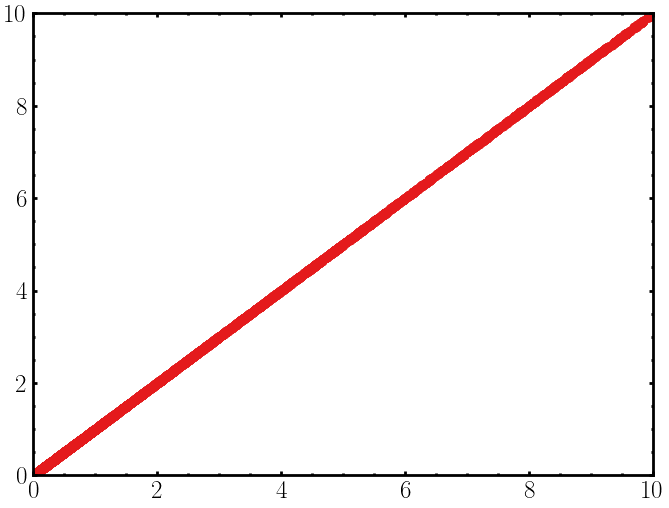

In [20]:
plt.scatter(test.debug_df["es"], test.debug_df["jaxflat"])
plt.xlim(0,10)
plt.ylim(0,10)

In [9]:
# plt.scatter(test.debug_df["distances"], test.debug_df["jaxflat"])

In [13]:
plt.hist(test.debug_df["es"] / test.debug_df["jaxflat"], bins=200000)

(array([4., 0., 0., ..., 0., 0., 2.]),
 array([-879.64803682, -879.6323568 , -879.61667677, ..., 2256.32554475,
        2256.34122477, 2256.3569048 ]),
 <BarContainer object of 200000 artists>)

Error in callback <function flush_figures at 0x7f0795e36670> (for post_execute):



KeyboardInterrupt



In [20]:
test

FF: LJ dcm ELECp Exact intE (jax_coloumb: False)

In [21]:
test.data

,TOTAL,ELEC,VDW,KEY,M_ENERGY,KEY,n_monomers,C_ENERGY,intE,P_intE,C_ENERGY_kcalmol,ELEC_CI,ELEC_POL,ELECpol,ELECci,ELECp,ELECm,ELECnull,DUMMY
100_1018_DCM_120_967,8.04068,-1.88784,-30.40458,100_1018_DCM_120_967,-19187.367411,100_1018_DCM_120_967,20,-19187.387191,-12.411790,-12.532116,-1.204014e+07,-20.567562,-1.421479,-21.599542,-20.567562,-1.88784,-5.55673,-0.0,0.0
100_1019_DCM_120_565,9.89488,-2.62215,-35.67010,100_1019_DCM_120_565,-19187.356685,100_1019_DCM_120_565,20,-19187.379774,-14.488511,-15.246951,-1.204014e+07,-28.837646,-2.050995,-30.129872,-28.837646,-2.62215,-7.65099,-0.0,0.0
100_1024_DCM_121_932,10.32904,-1.47130,-31.15835,100_1024_DCM_121_932,-19187.342979,100_1024_DCM_121_932,20,-19187.365864,-14.360149,-13.865660,-1.204013e+07,-16.497216,-1.404197,-17.508540,-16.497216,-1.47130,-4.03920,-0.0,0.0
100_1053_DCM_123_948,9.79551,-3.52281,-35.38260,100_1053_DCM_123_948,-19187.359041,100_1053_DCM_123_948,20,-19187.376685,-11.071544,-11.036796,-1.204014e+07,-34.970801,-1.757483,-36.197482,-34.970801,-3.52281,-8.05686,-0.0,0.0
100_1100_DCM_129_15,9.00233,-2.83638,-33.26086,100_1100_DCM_129_15,-19187.360730,100_1100_DCM_129_15,20,-19187.381994,-13.342866,-13.423951,-1.204014e+07,-38.877332,-2.678006,-40.843937,-38.877332,-2.83638,-9.75593,-0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
100_979_DCM_115_117,10.52301,-1.09235,-29.25850,100_979_DCM_115_117,-19187.343536,100_979_DCM_115_117,20,-19187.363317,-12.412769,-12.238591,-1.204013e+07,-15.129841,-1.104415,-15.793819,-15.129841,-1.09235,-3.17565,-0.0,0.0
100_983_DCM_116_25,9.49413,-3.69630,-36.41305,100_983_DCM_116_25,-19187.339973,100_983_DCM_116_25,20,-19187.356356,-10.280112,-11.185809,-1.204012e+07,-44.367339,-2.568431,-46.111346,-44.367339,-3.69630,-10.24308,-0.0,0.0
100_986_DCM_116_989,10.93140,-3.39350,-30.97783,100_986_DCM_116_989,-19187.330647,100_986_DCM_116_989,20,-19187.349940,-12.106152,-12.100108,-1.204012e+07,-24.987267,-1.390889,-25.979675,-24.987267,-3.39350,-8.05472,-0.0,0.0
100_98_DCM_12_534,10.41278,-1.78878,-35.84975,100_98_DCM_12_534,-19187.337523,100_98_DCM_12_534,20,-19187.363902,-16.552713,-17.572315,-1.204013e+07,-38.295094,-2.656555,-40.165244,-38.295094,-1.78878,-9.19456,-0.0,0.0


In [21]:
test.out_groups

Array([  0,   0,   0, ..., 199, 199, 199], dtype=int32)

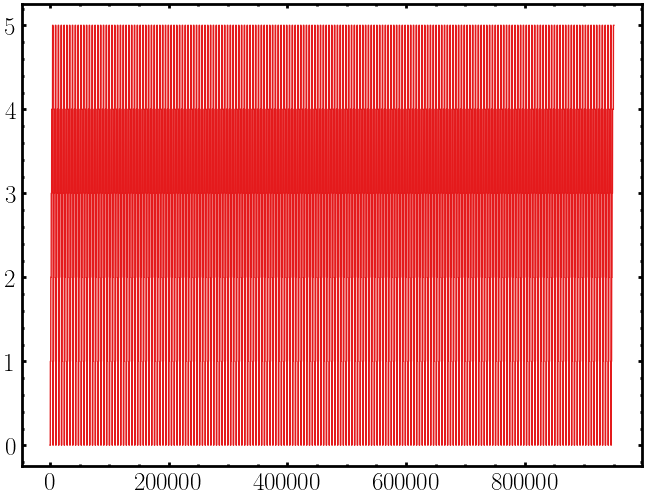

In [27]:
plt.plot(list(range(len(test.out_akps))), test.out_akps)

In [49]:
6//3


2

In [50]:
6.0//3

2.0